### Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading Dataset from sklearn
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer.keys()
print(cancer['DESCR'])
print(cancer['target'])
print(cancer['feature_names'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
cancer['data'].shape

(569, 30)

In [4]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [5]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Data Visualization

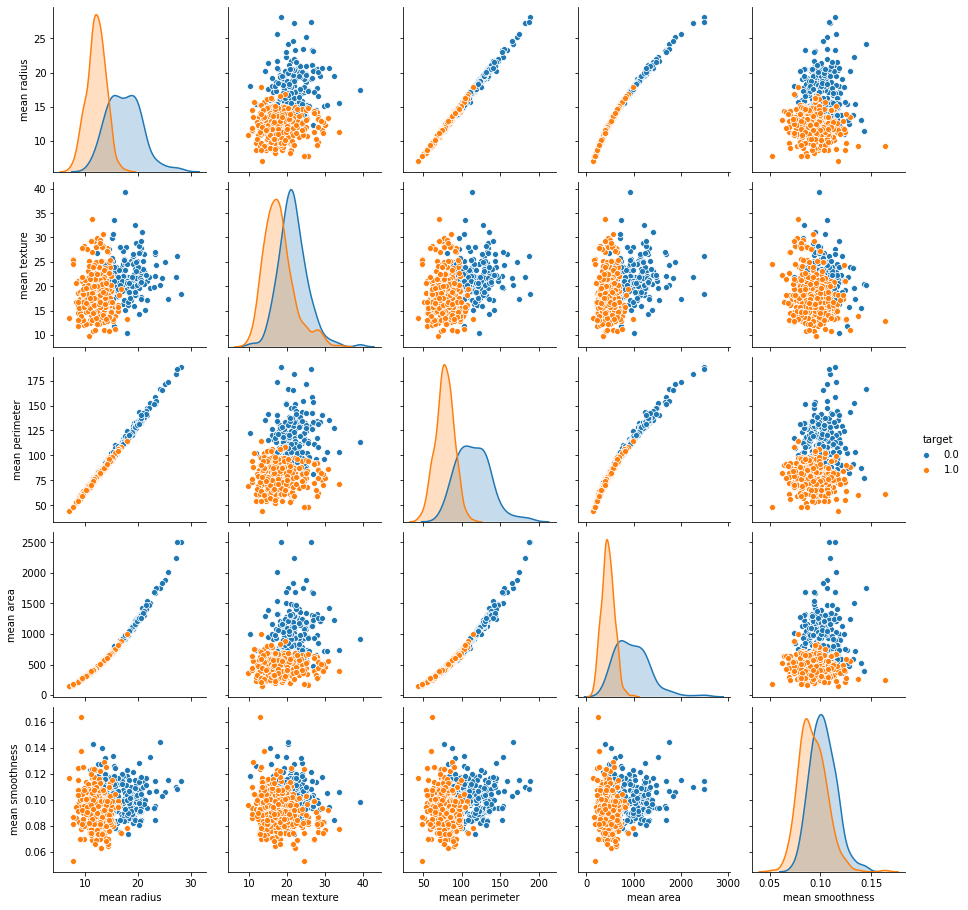

In [6]:
sns.pairplot(df_cancer,vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness'],hue='target')

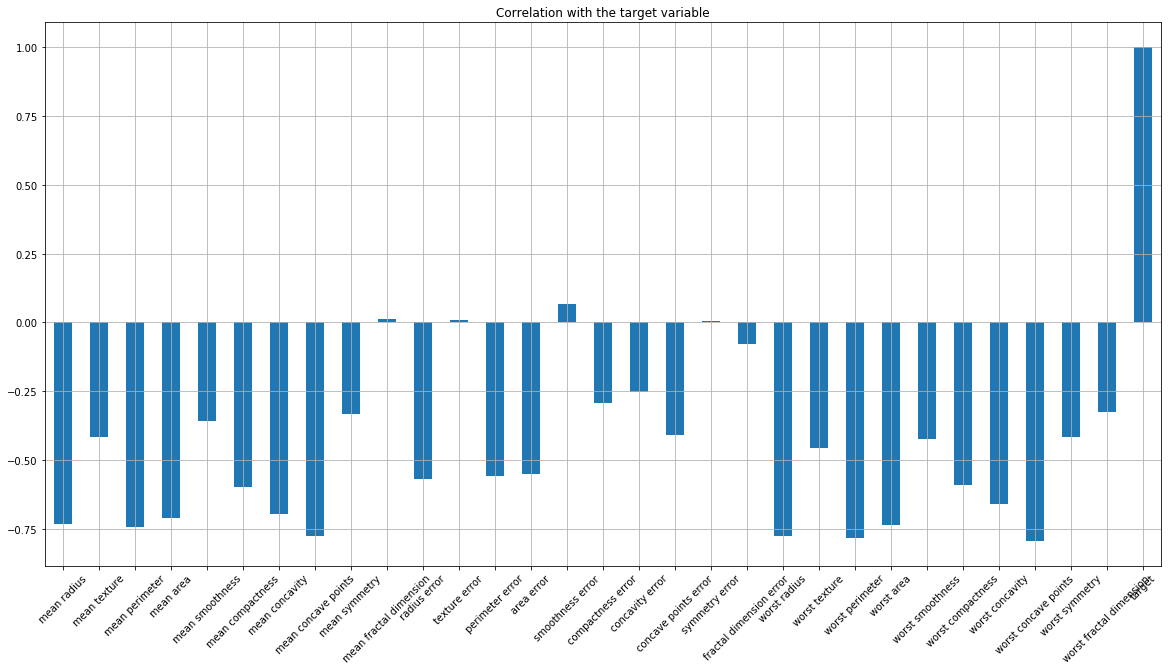

In [48]:
df_cancer.corrwith(df_cancer.target).plot.bar(figsize=(20,10),title='Correlation with the target variable',grid=True,rot=45)

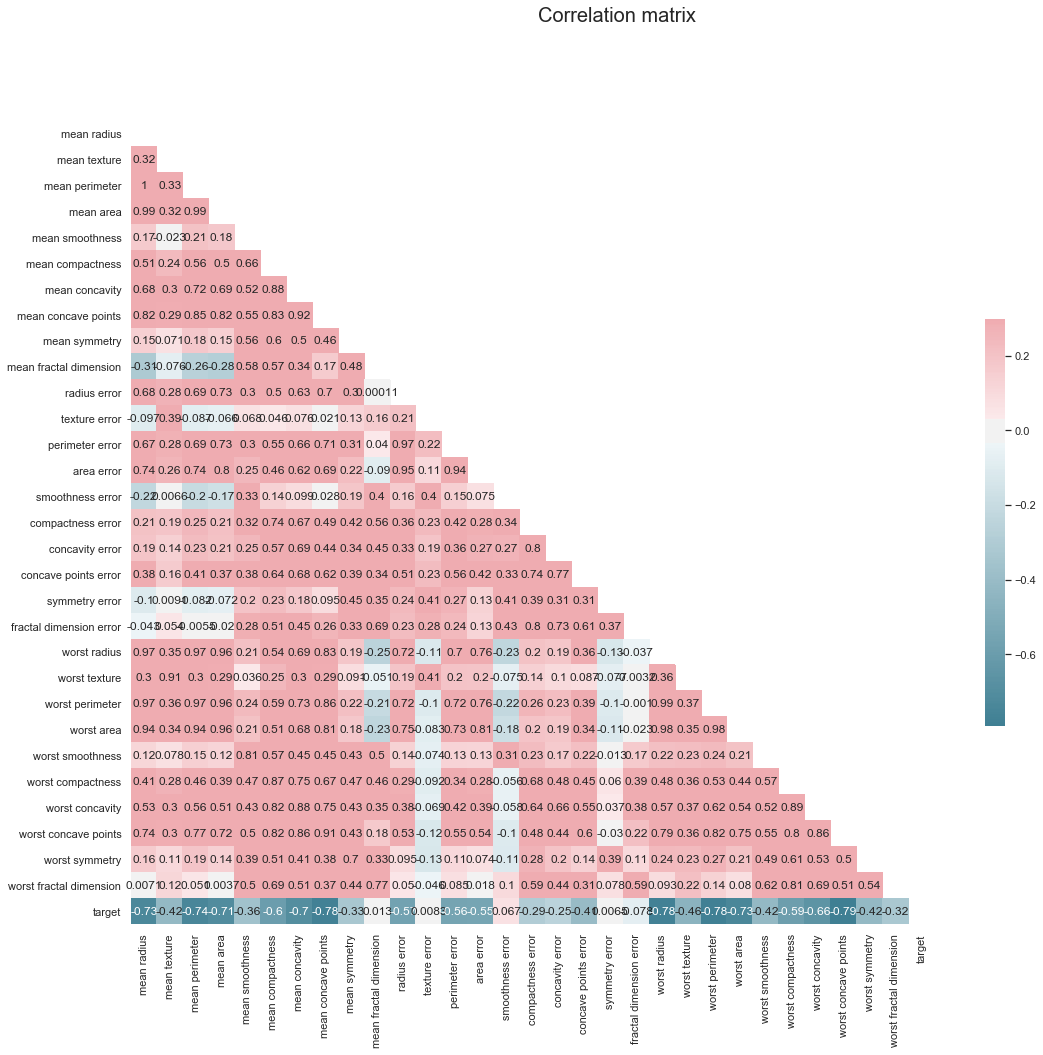

In [50]:
corr = df_cancer.corr()
sns.set(style='white')
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax = plt.subplots(figsize=(18,15))
f.suptitle("Correlation matrix",fontsize=20)

cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,annot=True,cmap=cmap,mask=mask,vmax=0.3,center=0,square=True,cbar_kws={'shrink':0.5})

### Model Training

In [7]:
X= df_cancer.drop(columns='target')
y= df_cancer['target']


In [8]:
#Splitting the data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

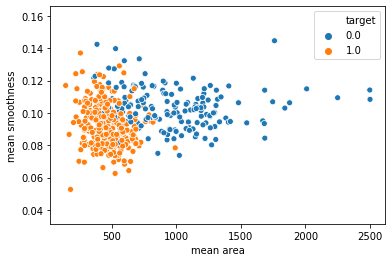

In [9]:
#Feature scaling for improving the accuracy 

min_train = X_train.min()
range_train = (X_train-min_train).max()

X_train_scaled = (X_train-min_train)/range_train

sns.scatterplot(X_train['mean area'],X_train['mean smoothness'],hue=y_train) #without scaling


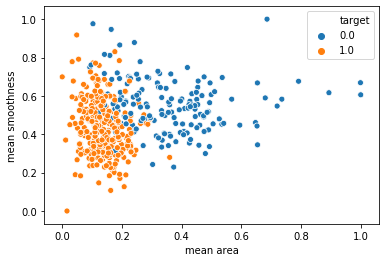

In [10]:
sns.scatterplot(X_train_scaled['mean area'],X_train_scaled['mean smoothness'],hue=y_train) #with scaling

In [11]:
min_test = X_test.min()
range_test = (X_test-min_test).max()

X_test_scaled = (X_test-min_test)/range_test

In [12]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_pred = classifier.predict(X_test_scaled)

In [17]:
y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.])

In [19]:
y_test.ravel()

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.])

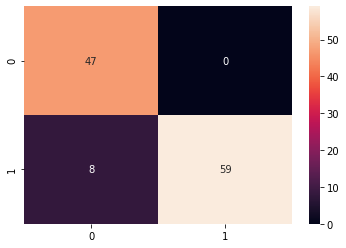

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [22]:
accuracy_score(y_test,y_pred)*100

92.98245614035088

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        47
         1.0       1.00      0.88      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



### K-Fold cross validation

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train_scaled,y=y_train,cv=10)
print('Accuracy : %0.3f (+/- %0.3f)'%(accuracies.mean(),accuracies.std()*2))


Accuracy : 0.980 (+/- 0.036)


### Parameter Tuning

In [37]:
parameters = {'C':[0.1,0.05,0.5,0.9,0.7,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','linear']}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(),param_grid=parameters,refit=True,verbose=4)
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.989, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.978, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.934, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.967, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.967, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.05, 0.5, 0.9, 0.7, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [38]:
grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [39]:
g_pred = grid_search.predict(X_test_scaled)

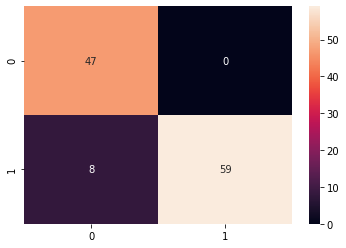

In [40]:
cm = confusion_matrix(y_test,g_pred)
sns.heatmap(cm,annot=True)

In [47]:
print('Best Score: {:0.2f} %'.format(grid_search.best_score_*100))

Best Score: 98.24 %
